## Import librairies

In [1]:
import torch
import numpy as np 
import os
import pandas as pd
import tqdm 
import sys

sys.path.append(os.path.abspath('../utilities'))
import utils
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix

from data_loader import DataSplitLoader
from sklearn.metrics import accuracy_score
from utils import ModelTrainer, evalBuilder
from matplotlib import rcParams



from hparams import hparams
hparams.parse_argument(args=["--batch_size", "128"])
 

-------------------------
Hyper Parameter Settings
-------------------------
batch_size: 128
num_epochs: 100
learning_rate: 0.1
stopping_rate: 1e-05
momentum: 0.6
factor: 0.2
patience: 30
condition: improvement
input_size: 1
hidden_size: 64
output_size: 64
pool_size: 3
threshold: 0.5
checkpoint_interval: 10
-------------------------


'c:\\Users\\Natsu\\OneDrive\\Bureau\\audioFoleyDeepFake-2\\deepfakeClassifiers\\utilities'

In [2]:
# dir_vgg_mlp = './models_vggish_MLP'
# dir_clap_mlp = './models_clap_MLP'
# dir_vgg_cnn = './models_vggish_CNN'
# dir_clap_cnn = './models_clap_CNN'
# dir_pann_mlp = './models_pann-wavegram_MLP'
dir_pann32k_mlp = './models_pann-32k_MLP'

# model_MLP_vgg = [torch.load(f"{dir_vgg_mlp}/{file}") for file in os.listdir(dir_vgg_mlp) if 'pth' in file]
# model_MLP_clap = [torch.load(f"{dir_clap_mlp}/{file}") for file in os.listdir(dir_clap_mlp) if 'pth' in file]
# model_MLP_pann = [torch.load(f"{dir_pann_mlp}/{file}") for file in os.listdir(dir_pann_mlp) if 'pth' in file]
model_MLP_pann_32k = [torch.load(f"{dir_pann32k_mlp}/{file}") for file in os.listdir(dir_pann32k_mlp) if 'pth' in file]


In [2]:
import pickle




df_mlp_pann['Model number'] = df_mlp_pann['Model number'].str.replace('clap', 'pann')

In [2]:
# Run if File pickle already exists in folder
import pickle

with open('./DeepFake_Real_Sounds.pkl', 'rb') as file:
    data_final = pickle.load(file)
data_final


,class,embedding,embedding_type,label,system_id,track,path_file,id
0,dog_bark,"[[-0.6465, -0.705, -0.2708, -1.329, -0.2389, -...",vggish,1,TASys02,A,./DCASE_2023/DCASE_2023_Challenge_Task_7_Submi...,0
1,dog_bark,"[[-0.564, -0.25, 0.7427, -0.3833, 0.01987, -0....",vggish,1,TASys02,A,./DCASE_2023/DCASE_2023_Challenge_Task_7_Submi...,1
2,dog_bark,"[[-0.33, -0.2524, -0.2025, -1.947, -0.776, -1....",vggish,1,TASys02,A,./DCASE_2023/DCASE_2023_Challenge_Task_7_Submi...,2
3,dog_bark,"[[-0.7124, -0.6235, -0.579, -1.739, -0.384, -1...",vggish,1,TASys02,A,./DCASE_2023/DCASE_2023_Challenge_Task_7_Submi...,3
4,dog_bark,"[[-0.2844, -0.4236, 0.2023, -1.006, -0.4763, -...",vggish,1,TASys02,A,./DCASE_2023/DCASE_2023_Challenge_Task_7_Submi...,4
...,...,...,...,...,...,...,...,...
22195,sneeze_cough,"[[0.0, 1.358, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",panns-cnn14-32k,0,None,None,./DCASE_2023/DCASE_2023_Challenge_Task_7_Datas...,122995
22196,sneeze_cough,"[[0.0, 0.652, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",panns-cnn14-32k,0,None,None,./DCASE_2023/DCASE_2023_Challenge_Task_7_Datas...,122996
22197,sneeze_cough,"[[0.0, 1.222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",panns-cnn14-32k,0,None,None,./DCASE_2023/DCASE_2023_Challenge_Task_7_Datas...,122997
22198,sneeze_cough,"[[0.0, 1.58, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004833...",panns-cnn14-32k,0,None,None,./DCASE_2023/DCASE_2023_Challenge_Task_7_Datas...,122998


In [3]:
train_loader_vgg,eval_loader_vgg,valid_loader_vgg = DataSplitLoader(data_final= data_final, hparams=hparams, embedding_type='vggish')
train_loader_clap,eval_loader_clap,valid_loader_clap = DataSplitLoader(data_final= data_final, hparams=hparams, embedding_type='clap-2023')
train_loader_pann32k,eval_loader_pann32k,valid_loader_pann32k = DataSplitLoader(data_final= data_final, hparams=hparams, embedding_type='panns-cnn14-32k')
train_loader_pann,eval_loader_pann,valid_loader_pann = DataSplitLoader(data_final= data_final, hparams=hparams, embedding_type='panns-wavegram-logmel')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

## ROC CURVE of models

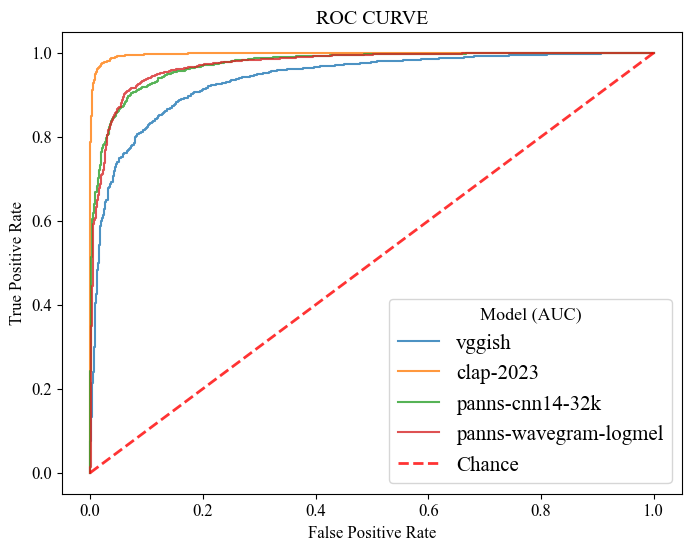

In [69]:
model_MLP_vgg = torch.load('./models_vggish_MLP/model_MLP_4.pth')
model_MLP_clap = torch.load('./model_best_clap_sounds/model_MLP_2.pth')
model_MLP_pann = torch.load('./models_pann-wavegram_MLP/model_MLP_8.pth')
model_MLP_pann32k = torch.load('./models_pann-32k_MLP/model_MLP_5.pth')

model_names = {'vggish' : model_MLP_vgg, 'clap-2023' : model_MLP_clap , 'panns-cnn14-32k' : model_MLP_pann32k, 'panns-wavegram-logmel' : model_MLP_pann}
model_loaders = {'vggish' : eval_loader_vgg, 'clap-2023' : eval_loader_clap , 'panns-cnn14-32k' : eval_loader_pann32k, 'panns-wavegram-logmel' : eval_loader_pann}

plt.figure(figsize=(8, 6))

for model_name in model_names.keys() :

    clf = ModelTrainer(model = model_names[model_name], hparams=hparams)
    true_labels, prediction_scores = clf.predict(model=model_names[model_name],loader=model_loaders[model_name],binary= False)
    fpr, tpr, thresholds = roc_curve(true_labels, prediction_scores)

    rcParams['font.family'] = 'serif'
    rcParams['font.serif'] = 'Times New Roman'
    rcParams['font.size'] = 12

    plt.plot(fpr,tpr, label=f'{model_name}', alpha=.8)


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=15, title='Model (AUC)', title_fontsize='13')
plt.title('ROC CURVE')
plt.show()


## Precision-Recall Curve of models

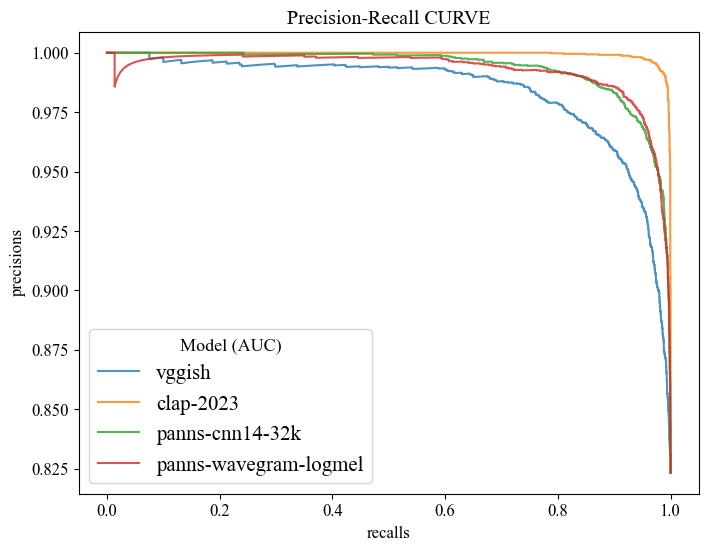

In [70]:
plt.figure(figsize=(8, 6))

for model_name in model_names.keys() :

    clf = ModelTrainer(model = model_names[model_name], hparams=hparams)
    true_labels, prediction_scores = clf.predict(model=model_names[model_name],loader=model_loaders[model_name],binary= False)
    precisions, recalls, thresholds = precision_recall_curve(true_labels, prediction_scores)

    rcParams['font.family'] = 'serif'
    rcParams['font.serif'] = 'Times New Roman'
    rcParams['font.size'] = 12

    plt.plot(recalls,precisions, label=f'{model_name}', alpha=.8)


plt.xlabel('recalls')
plt.ylabel('precisions')
plt.legend(loc='lower left', fontsize=15, title='Model (AUC)', title_fontsize='13')
plt.title('Precision-Recall CURVE')
plt.show()

In [43]:
with open('./models_vggish_MLP/model_infos.pkl', 'rb') as file:
    df_mlp_vgg = pickle.load(file)
with open('./models_clap_MLP/model_infos.pkl', 'rb') as file:
    df_mlp_clap = pickle.load(file)
with open('./models_pann-wavegram_MLP/model_infos.pkl', 'rb') as file:
    df_mlp_pann = pickle.load(file)
with open('./models_pann-32k_MLP/model_infos.pkl', 'rb') as file:
    df_mlp_pann_32k = pickle.load(file)

dfs = {'vggish' : df_mlp_vgg, 'clap-2023' : df_mlp_clap , 'panns-cnn14-32k' : df_mlp_pann_32k, 'panns-wavegram-logmel' : df_mlp_pann}

stats_df = []
for model_name in dfs.keys() :
    df_infos = dfs[model_name]
    times = df_infos['Time/epoch']
    mean_accuracy = df_infos['Eval Accuracy'].mean()
    accuracy_diff = df_infos['Eval Accuracy'].max() - df_infos['Eval Accuracy'].min()
    sdev = df_infos['Eval Accuracy'].std()
    mean_time = np.mean(times)
    time_diff = np.max(times) - np.min(times)
    sdev_time = np.std(times)

    stats_df.append({
        'Model': model_name,
        'Mean Overall Accuracy': mean_accuracy,
        'SDev': sdev,
        'Mean Time/epoch': f"{mean_time:.2f}s",
        'Time/epoch SDev': f"{sdev_time:.2f}",
    })

stats_df = pd.DataFrame(stats_df)
stats_df

,Model,Mean Overall Accuracy,SDev,Mean Time/epoch,Time/epoch SDev
0,vggish,88.114633,0.729222,0.10s,0.01
1,clap-2023,98.022664,0.185354,0.08s,0.01
2,panns-cnn14-32k,93.048941,0.320475,0.10s,0.01
3,panns-wavegram-logmel,93.154869,0.346730,0.11s,0.05


## Heat Map Matrices

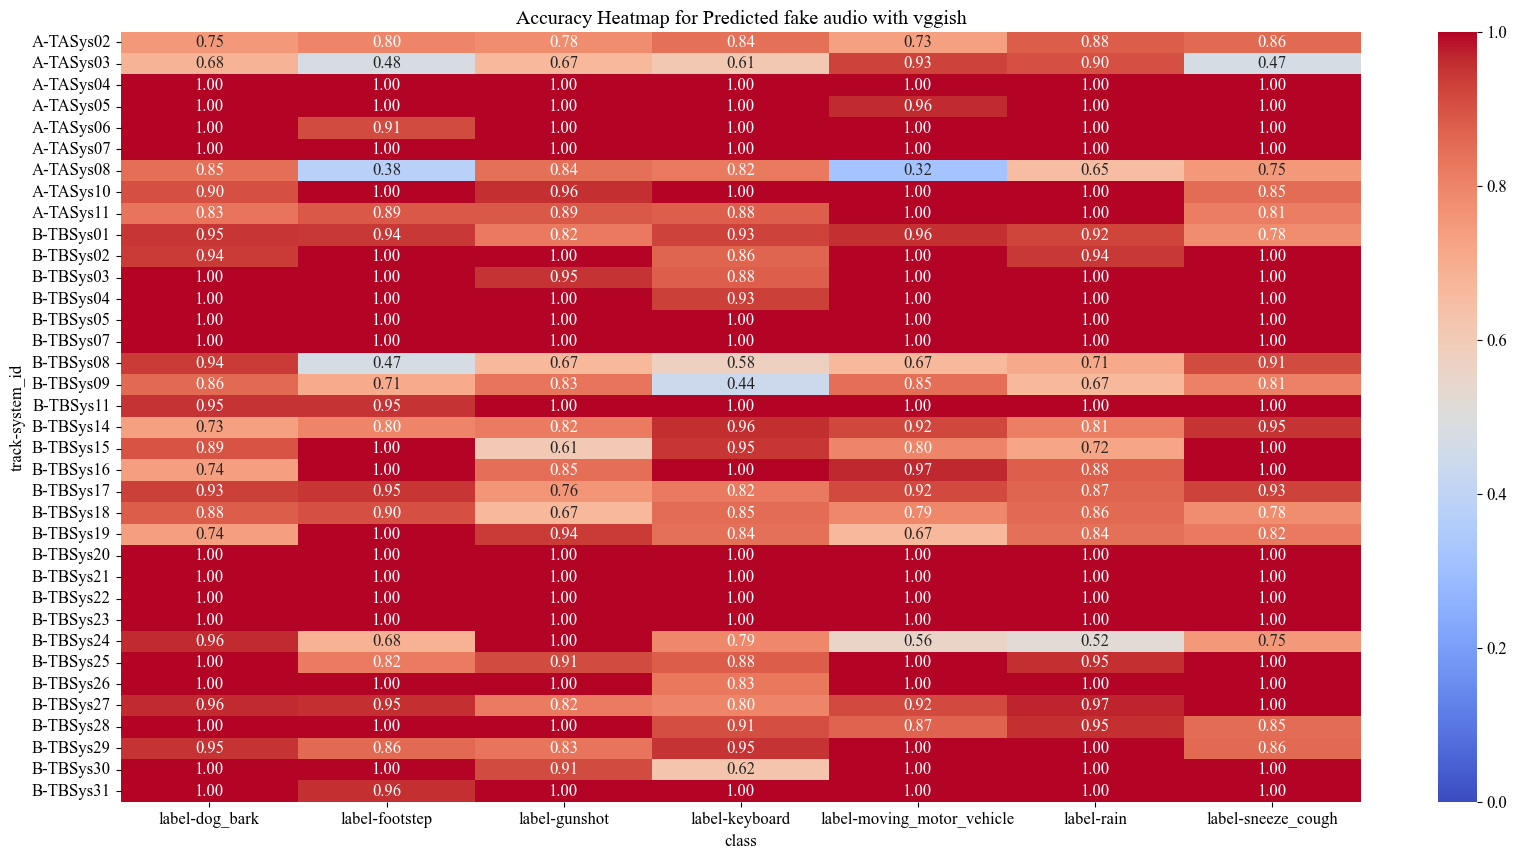

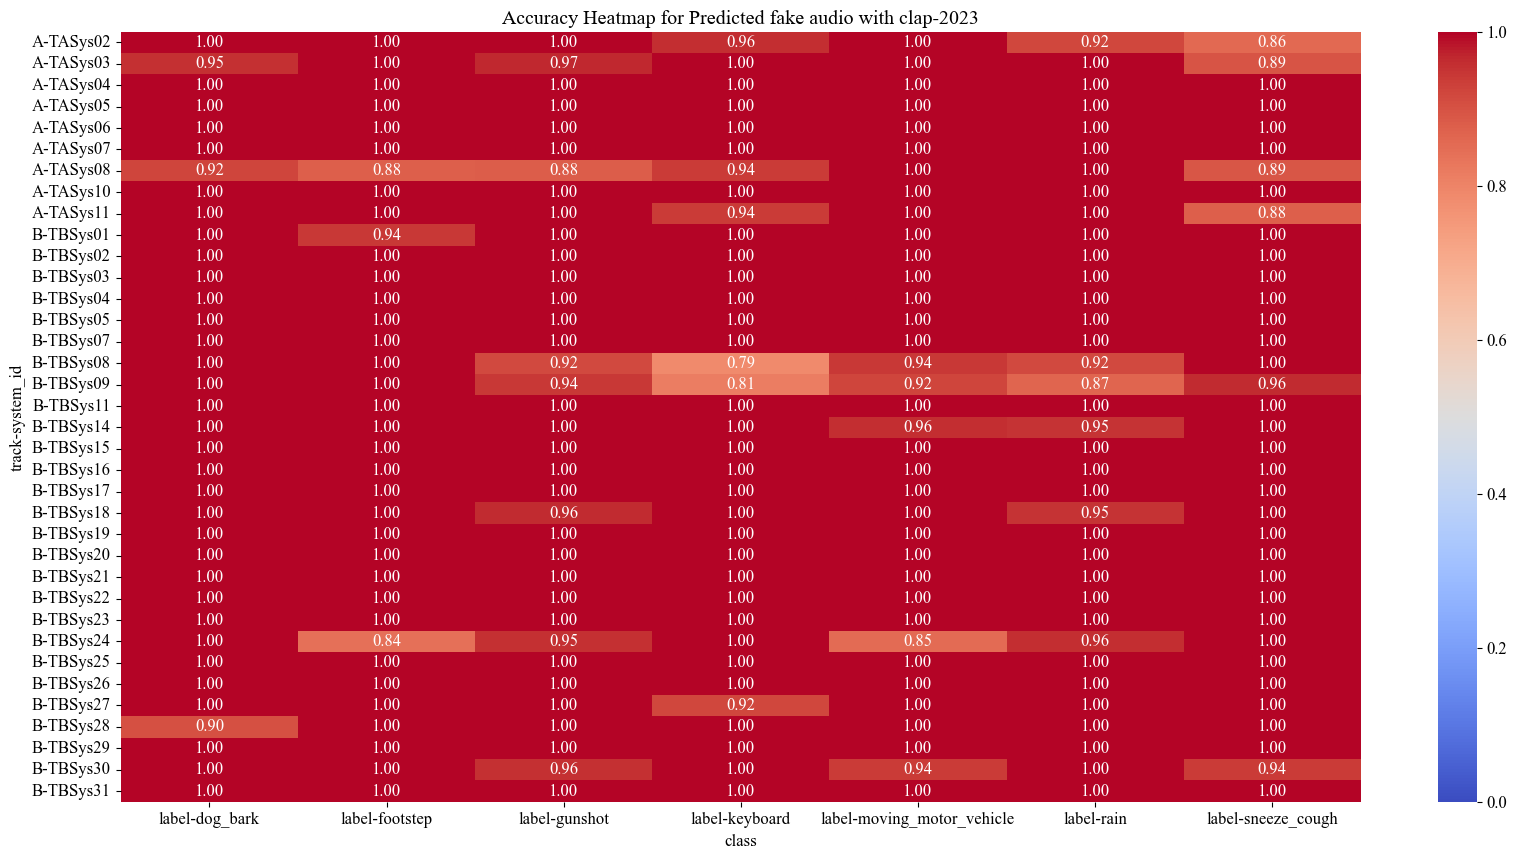

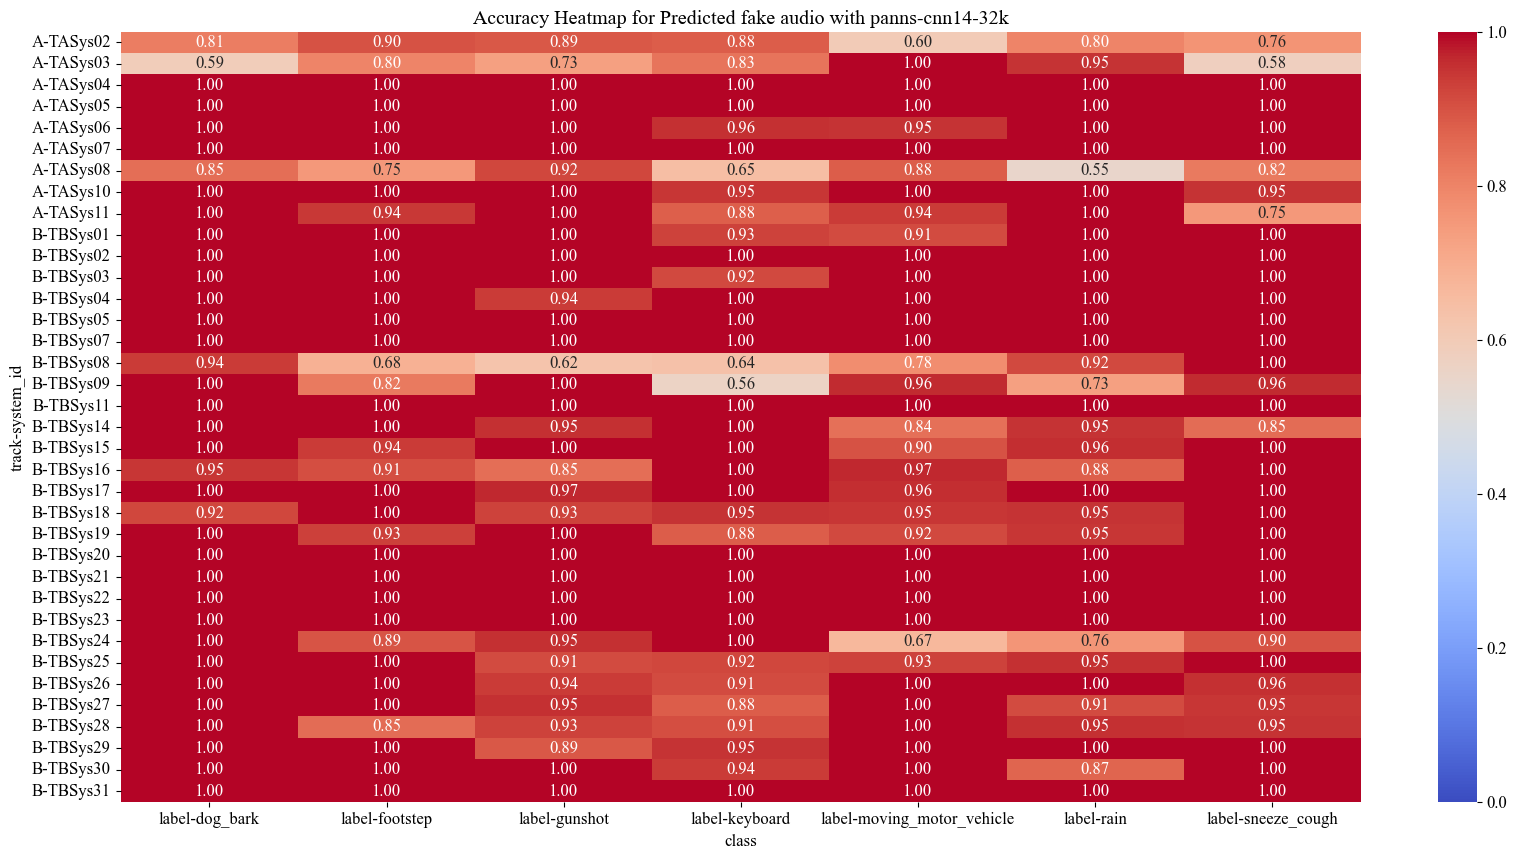

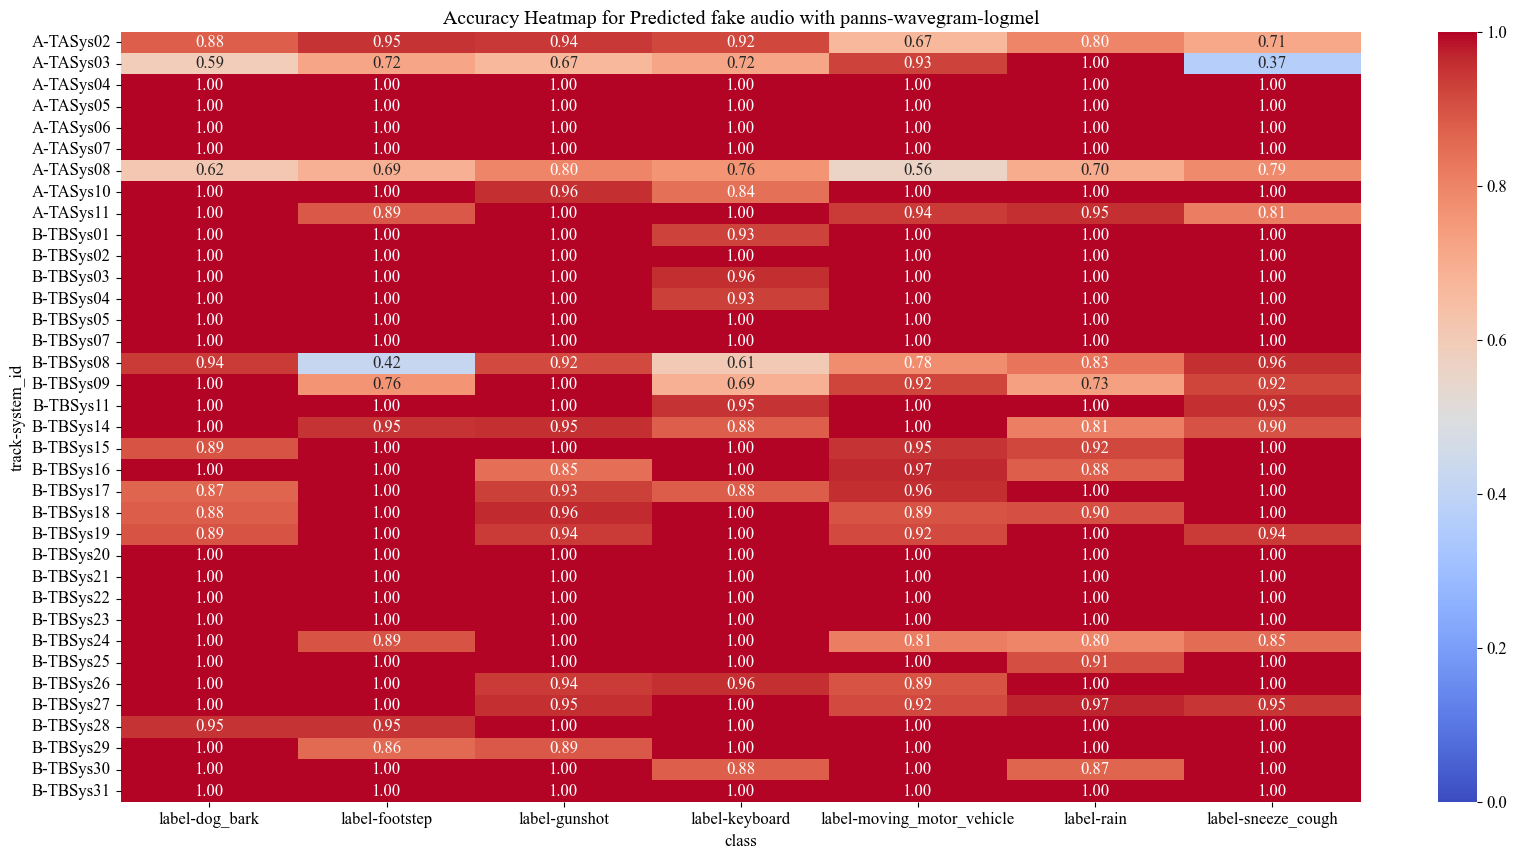

In [71]:
import seaborn as sns
for model_name in model_names.keys():
    data_test = evalBuilder(data_final=data_final,model=model_names[model_name],eval_loader=model_loaders[model_name])
    data_test_matrix = data_test[data_test['label'] == 1]

    accuracy_matrix = pd.pivot_table(
        data_test_matrix,
        values=['label', 'pred_result'],
        index=['track', 'system_id'],
        columns='class',
        aggfunc={'label': lambda x: accuracy_score(x, data_test_matrix.loc[x.index, 'pred_result'])},
        fill_value=0
    )

    plt.figure(figsize=(20, 10))
    sns.heatmap(accuracy_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
    plt.title(f'Accuracy Heatmap for Predicted fake audio with {model_name}')
    plt.xlabel('class')  # Set x-axis label
    plt.show()

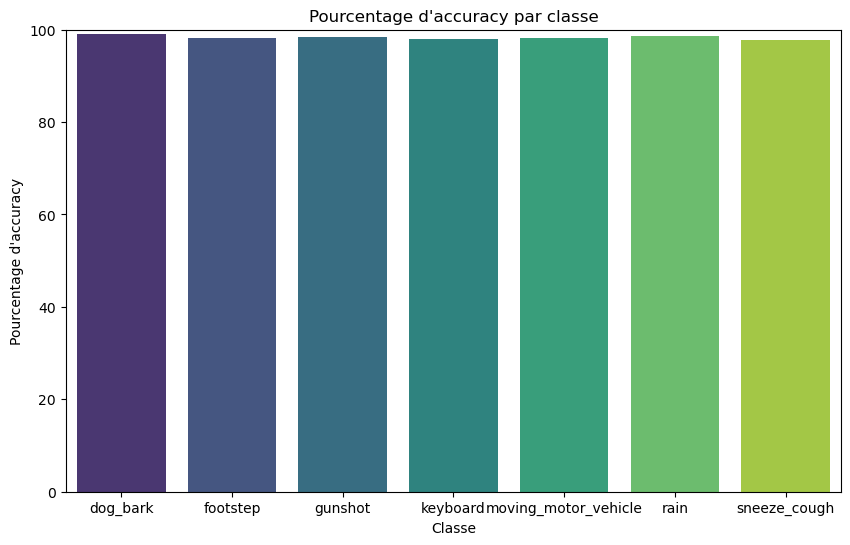

,class,accuracy
0,dog_bark,99.044205
1,footstep,98.115430
2,gunshot,98.299320
3,keyboard,98.039216
4,moving_motor_vehicle,98.133022
5,rain,98.550725
6,sneeze_cough,97.762073


In [ ]:
import seaborn as sns
with open('Prediction_results', 'wb') as file:
    pickle.dump(data_test, file)
accuracy_by_class = data_test.groupby('class').apply(lambda x: (x['label'] == x['pred_result']).mean() * 100).reset_index(name='accuracy')


plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='accuracy', data=accuracy_by_class, palette='viridis')
plt.title('Pourcentage d\'accuracy par classe')
plt.ylabel('Pourcentage d\'accuracy')
plt.xlabel('Classe')
plt.ylim(0, 100)  
plt.show()
accuracy_by_class

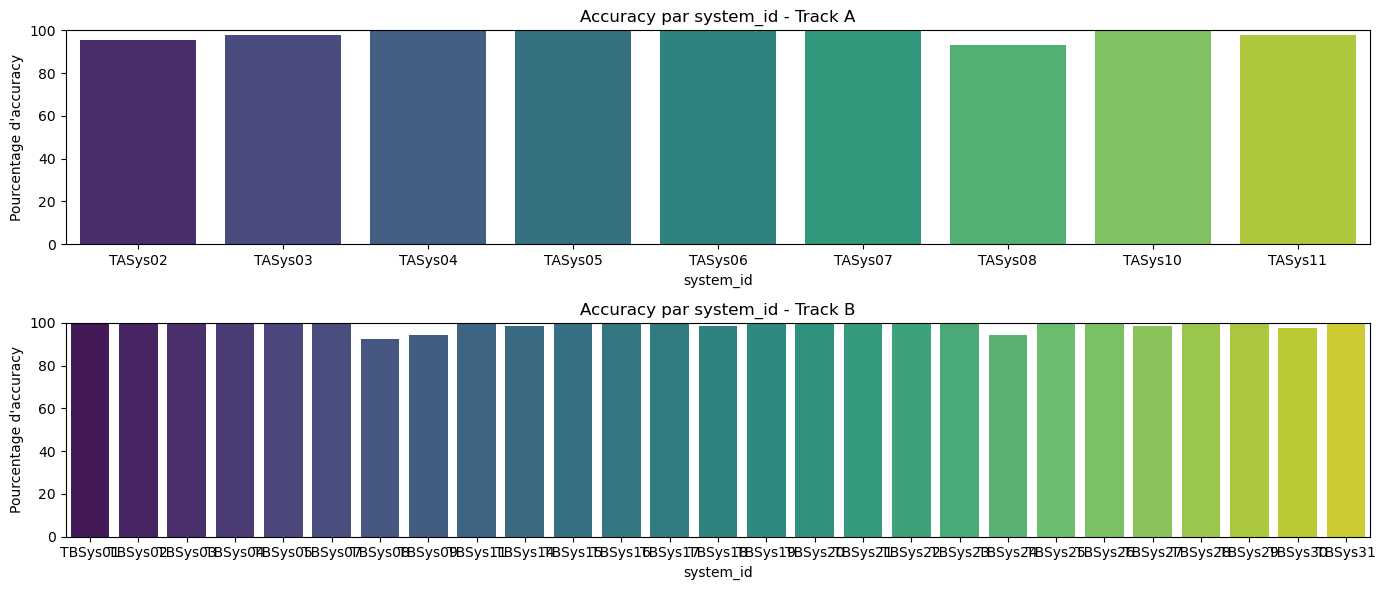

In [ ]:
accuracy_by_track_system = data_test.groupby(['track', 'system_id']).apply(lambda x: (x['label'] == x['pred_result']).mean() * 100).reset_index(name='accuracy')

def calculate_loss(x):
    pred_probs = torch.tensor(x['pred_probability'].values, dtype=torch.float32)
    labels = torch.tensor(x['label'].values, dtype=torch.float32)
    # Compute individual losses without reduction
    individual_losses = F.binary_cross_entropy(pred_probs, labels, reduction='none')
    # Sum up the individual losses to get the total loss for the group
    total_loss = individual_losses.sum().item()
    return total_loss



loss_by_track_system = data_test.groupby(['track', 'system_id']).apply(calculate_loss).reset_index(name='loss')


fig, axes = plt.subplots(2, 1, figsize=(14, 6), sharey=True)

for i, track in enumerate(['A', 'B']):
    track_data = accuracy_by_track_system[accuracy_by_track_system['track'] == track]
    sns.barplot(x='system_id', y='accuracy', data=track_data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Accuracy par system_id - Track {track}')
    axes[i].set_ylabel('Pourcentage d\'accuracy')
    axes[i].set_xlabel('system_id')
    axes[i].set_ylim(0, 100)  

plt.tight_layout()
plt.show()

In [ ]:
accuracy_by_track_system=accuracy_by_track_system.sort_values(by='accuracy')
print("Accuracy on true labels", np.mean(data_test[data_test['system_id'].isna()]['pred_result'].values== (data_test[data_test['system_id'].isna()]['label'].values))*100, "%")
metadata=pd.read_csv('./DCASE_2023/DCASE_2023_Challenge_Task_7_Submission/dcase_task7_submission_meta.csv')
metadata_results= pd.merge(accuracy_by_track_system, metadata[['system_id', 'label']], on='system_id', how='left')
metadata_results = metadata_results.rename(columns={'label': 'name_team'})
metadata_results['accuracy']= metadata_results['accuracy'].round(2)

Accuracy on true labels 96.00742804085422 %


In [ ]:
metadata_results_loss= pd.merge(loss_by_track_system, metadata[['system_id', 'label']], on='system_id', how='left')
metadata_results_loss = metadata_results_loss.rename(columns={'label': 'name_team'})
metadata_results_loss

,track,system_id,loss,name_team
0,A,TASys02,21.084259,Chon_Gaudio_task7_trackA_1
1,A,TASys03,12.288786,Scheibler_LINE_task7_trackA_1
2,A,TASys04,0.000166,Lee_maum_task7_trackA_1
3,A,TASys05,0.000009,Lee_maum_task7_trackA_2
4,A,TASys06,0.006420,Lee_maum_task7_trackA_3
5,A,TASys07,0.000612,Lee_maum_task7_trackA_4
6,A,TASys08,18.227369,Yi_SURREY_task7_trackA_1
7,A,TASys10,0.000455,Guan_HEU_task7_trackA_1
8,A,TASys11,12.553490,Guan_HEU_task7_trackA_2
9,B,TBSys01,1.593340,Xie_SJTU_task7_trackB_1


In [ ]:
def select_sounds(df, classes,threshold = 0.48):
    selected_sounds = pd.DataFrame()
    for cls in classes:
        df_class = df[df['class'] == cls]
        
        # False Negative: label is 1 but predicted as 0, sort by highest probability
        fn = df_class[(df_class['label'] == 1) & (df_class['pred_result'] == 0)]
        fn = fn.sort_values(by='pred_probability', ascending=True).head(7)
        fn['category'] = 'FN'
        
        # False Positive: label is 0 but predicted as 1, sort by lowest probability
        fp = df_class[(df_class['label'] == 0) & (df_class['pred_result'] == 1)]
        fp = fp.sort_values(by='pred_probability', ascending=False).head(7)
        fp['category'] = 'FP'
        
        # True Positive: label and prediction both 0, probability < 0.4, sort closest to 0.4
        tp = df_class[(df_class['label'] == 1) & (df_class['pred_result'] == 1) & (df_class['pred_probability'] > threshold)]
        tp = tp.sort_values(by='pred_probability', ascending=True).head(7)
        tp['category'] = 'TP'

        tp_1 = df_class[(df_class['label'] == 1) & (df_class['pred_result'] == 1)]
        tp_1 = tp_1.sort_values(by='pred_probability', ascending=False).head(7)
        tp_1['category'] = 'TP SURE'

        tn = df_class[(df_class['label'] == 0) & (df_class['pred_result'] == 0)]
        tn = tn.sort_values(by='pred_probability', ascending=True).head(7)
        tn['category'] = 'TN'

        
        
        selected_sounds = pd.concat([selected_sounds, fn, fp, tp, tp_1,tn])
    
    return selected_sounds

# Assuming data_test is your dataframe and it contains 'class', 'label', 'pred_result', and 'pred_probability' columns
selected_sounds = select_sounds(data_test, data_test['class'].unique())


In [ ]:
selected_sounds

,class,embedding,embedding_type,label,system_id,track,path_file,id,pred_result,pred_probability,category
25971,dog_bark,"[[-1.336, 1.623, -0.1923, -1.49, 0.746, 0.681,...",clap-2023,1,TASys03,A,./DCASE_2023/DCASE_2023_Challenge_Task_7_Submi...,25971,0.0,8.337398e-04,FN
29434,dog_bark,"[[-0.076, -0.1131, -0.08044, -0.8755, 0.0762, ...",clap-2023,1,TASys08,A,./DCASE_2023/DCASE_2023_Challenge_Task_7_Submi...,29434,0.0,3.394272e-02,FN
47635,dog_bark,"[[0.00625, 0.10925, -0.706, -0.0841, 0.435, 0....",clap-2023,1,TBSys28,B,./DCASE_2023/DCASE_2023_Challenge_Task_7_Submi...,47635,0.0,3.882723e-01,FN
5731,dog_bark,"[[0.3179, -0.802, -1.103, -0.321, 0.882, -0.26...",clap-2023,0,None,None,./DCASE_2023/DCASE_2023_Challenge_Task_7_Datas...,106531,1.0,9.992955e-01,FP
6062,dog_bark,"[[-0.2903, 0.01907, -0.03848, -0.786, 0.646, -...",clap-2023,0,None,None,./DCASE_2023/DCASE_2023_Challenge_Task_7_Datas...,106862,1.0,9.981494e-01,FP
...,...,...,...,...,...,...,...,...,...,...,...
10022,sneeze_cough,"[[-0.001595, 0.6245, 0.774, -1.512, 0.776, 1.5...",clap-2023,0,None,None,./DCASE_2023/DCASE_2023_Challenge_Task_7_Datas...,110822,0.0,6.537505e-08,TN
10235,sneeze_cough,"[[0.0003474, 1.056, -0.2423, -1.586, -0.4316, ...",clap-2023,0,None,None,./DCASE_2023/DCASE_2023_Challenge_Task_7_Datas...,111035,0.0,9.026739e-08,TN
9806,sneeze_cough,"[[0.4265, 0.521, -0.917, -1.909, 0.4065, -0.58...",clap-2023,0,None,None,./DCASE_2023/DCASE_2023_Challenge_Task_7_Datas...,110606,0.0,1.380562e-07,TN
10093,sneeze_cough,"[[0.1132, 1.045, -0.4102, -1.394, -0.322, 0.78...",clap-2023,0,None,None,./DCASE_2023/DCASE_2023_Challenge_Task_7_Datas...,110893,0.0,2.018554e-07,TN
